# Market Supply and Demand for a Product

In [1]:
using Plots 
using Formatting
fmt = "%.2f"
maxx = 6

6

### Demand and supply as a function of price:

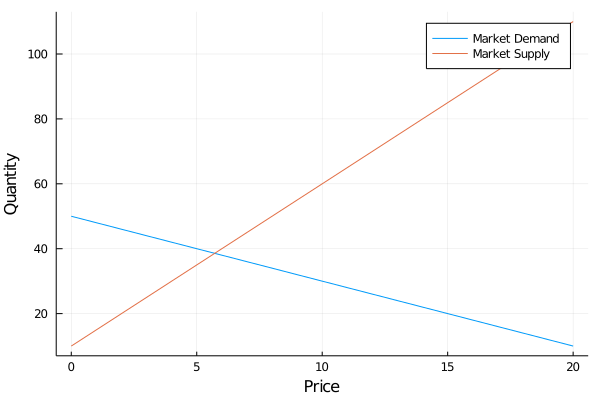

In [2]:
function demand(p) # demand as function of price
    50.0 - 2p
end

function supply(p) # supply as function of price
    10 + 5p
end

plot(demand,  0:20, xlabel = "Price", ylabel="Quantity", label="Market Demand")
plot!(supply, 0:20, label="Market Supply")

### Economists flip the y-axis and x-axis:

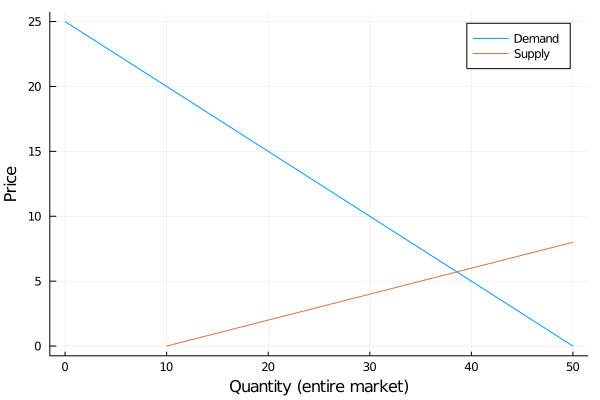

In [3]:
function Demand(q) # price as function of quantity demanded
    25.0 - 0.5q
end

function Supply(q) # price as function of quantity supplied
    -2 + 0.2q
end

plot(Demand,  0:50, xlabel = "Quantity (entire market)", ylabel="Price", label="Demand")
plot!(Supply, 10:50, label  = "Supply")

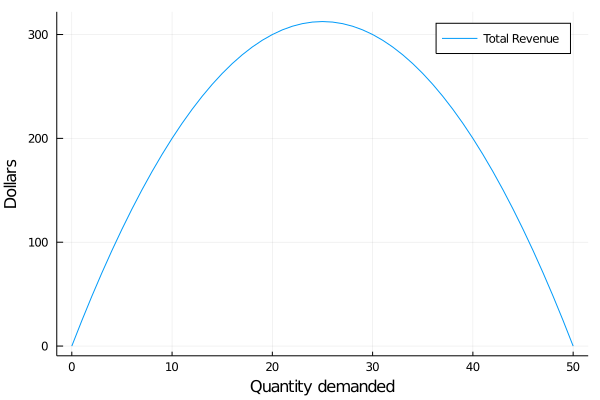

In [4]:
function Revenue(q)
    Demand(q)q # price as function of quantity demanded * quantity
end
plot(Revenue,  0:50, xlabel = "Quantity demanded", ylabel="Dollars", label="Total Revenue")

### Supply and demand meet when P(D) = 25 − 0.5Q = P(S) = −2 + 0.2Q, see slides or

https://www.symbolab.com/solver/equation-calculator/25%20%E2%88%92%200.5Q%20%3D%20%E2%88%922%20%2B%200.2Q

In [5]:
Price = Supply(270/7)
printfmt("{1:>1s}: {2:.2f}", "Price", Price)

Price: 5.71

### Bringing it all together (I):

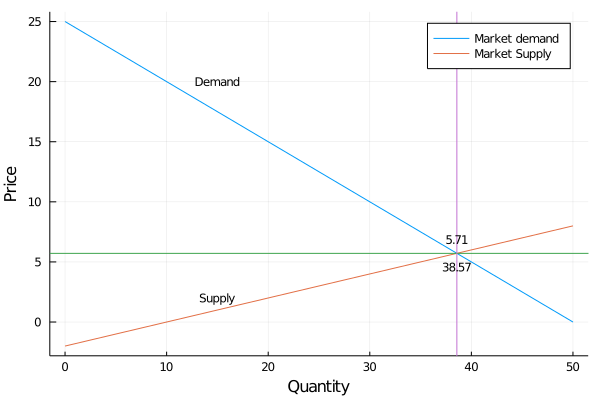

In [6]:
plot(Demand, 0:50, xlabel= "Quantity", ylabel="Price", label="Market demand")
plot!(Supply, 0:50, label="Market Supply")
plot!([(Price)], seriestype = "hline", label="")
plot!([supply(Price)],     seriestype = "vline", label="")
plot!(annotate = [(15,20,"Demand", 8)])
plot!(annotate = [(15,2,"Supply", 8)])
plot!(annotate = [(supply(Price), Price*1.2, sprintf1(fmt, Price), 8)])
plot!(annotate = [(supply(Price), Price*0.8, sprintf1(fmt, supply(Price)), 8)])

### Bringing it all together (II):

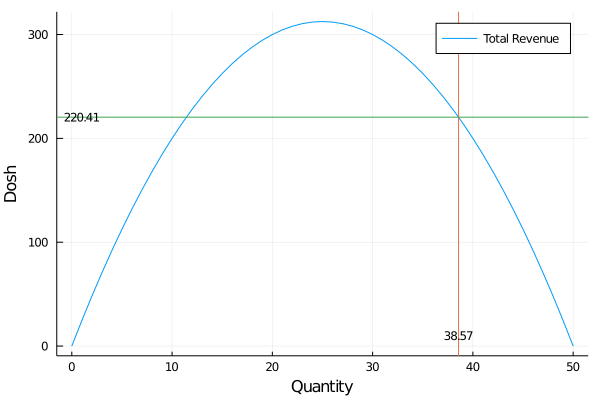

In [7]:
plot([Revenue], 0:50, xlabel= "Quantity", ylabel="Dosh", label="Total Revenue")
plot!([demand(Price)],    seriestype = "vline", label="")
plot!([Revenue(demand(Price))], seriestype = "hline", label="")
plot!(annotate = [(1,  Revenue(demand(Price)), sprintf1(fmt, Revenue(demand(Price))), 8)])
plot!(annotate = [(demand(Price), 10, sprintf1(fmt, demand(Price))   , 8)])

### What about the response of markets to a 1 percent price change?

Use the slope from the first demand function (-2) to calculate the price elasticity of demand.

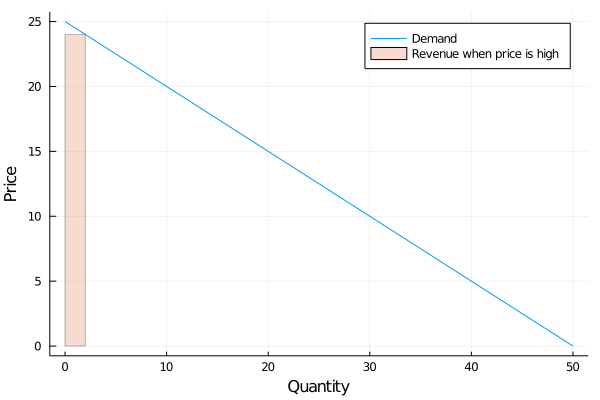

In [8]:
rectangle(w, h, x, y) = Shape(x .+ [0,w,w,0], y .+ [0,0,h,h])
plot(Demand, 0:50, xlabel= "Quantity", ylabel="Price", label="Demand")
Ptest = 24
plot!(rectangle(demand(Ptest),Ptest,0,0), opacity=.25, label="Revenue when price is high")

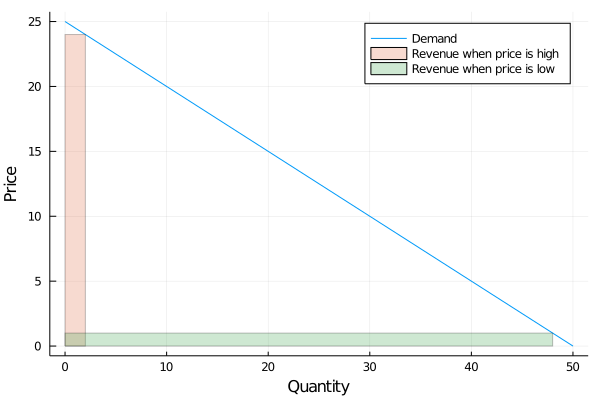

In [9]:
Ptest = 1
plot!(rectangle(demand(Ptest),Ptest,0,0), opacity=.25, label="Revenue when price is low")

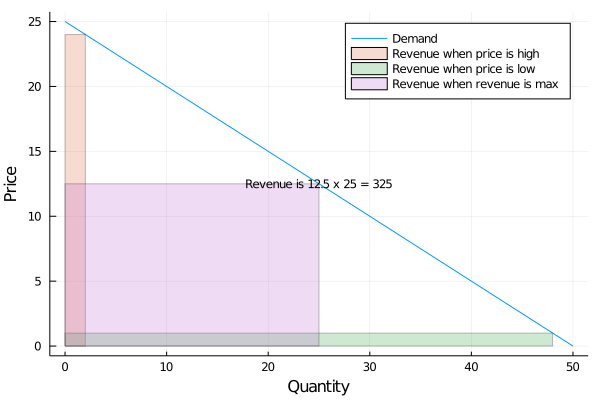

In [10]:
Ptest = 12.5
plot!(rectangle(demand(12.5),12.5,0,0), opacity=.25, label="Revenue when revenue is max")
plot!(annotate = [(25,12.5,"Revenue is 12.5 x 25 = 325", 8)])

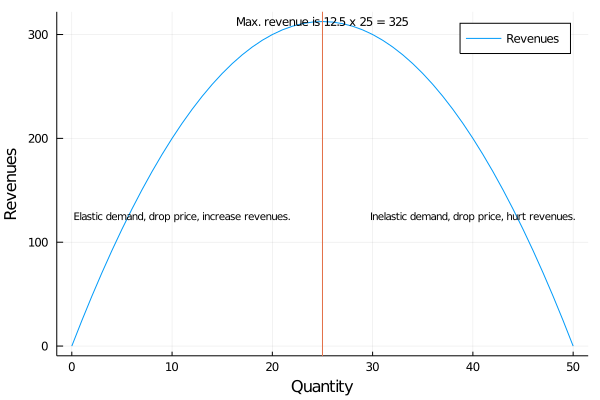

In [11]:
plot([Revenue], 0:50, xlabel= "Quantity", ylabel="Revenues", label="Revenues")
plot!([demand(Ptest)],    seriestype = "vline", label="")
plot!(annotate = [(11,125,"Elastic demand, drop price, increase revenues.", 7)])
plot!(annotate = [(40,125,"Inelastic demand, drop price, hurt revenues.", 7)])
plot!(annotate = [(25,25*12.5,"Max. revenue is 12.5 x 25 = 325", 8)])

In [12]:
function elasticity(p)
    -2.0p / demand(p)
end

elasticity (generic function with 1 method)

### Test for a price of $12.50:

In [13]:
P1 = 12.5
printfmt("{1:>1s}: {2:.2f}\n", "Elasticity at price of \$12.50", elasticity(P1))
printfmt("{1:>1s}: {2:.2f}\n", "Demand at that price", demand(P1))

Elasticity at price of $12.50: -1.00
Demand at that price: 25.00


### Plot elasticities for a range of prices:

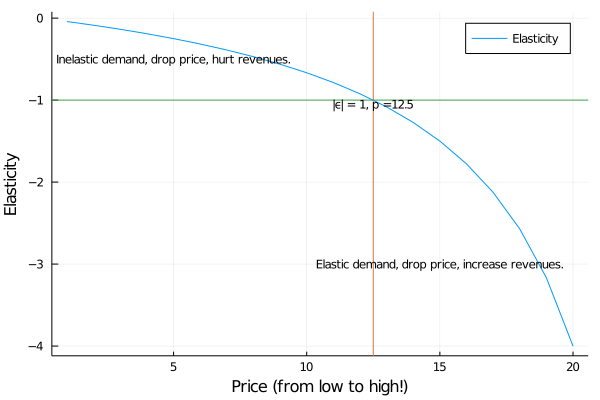

In [14]:
plot(elasticity, 1:20, xlabel= "Price (from low to high!)", ylabel="Elasticity", label="Elasticity")
plot!([12.5], seriestype = "vline", label="")
plot!([-1], seriestype = "hline", label="")
plot!(annotate = [(12.5,-1.05,"|ϵ| = 1, p =12.5", 8)])
plot!(annotate = [(15,-3,"Elastic demand, drop price, increase revenues.", 8)])
plot!(annotate = [(5,-0.5,"Inelastic demand, drop price, hurt revenues.", 8)])

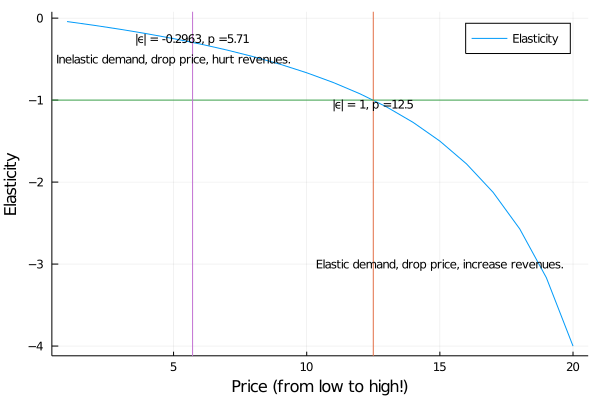

In [15]:
plot!([Price], seriestype = "vline", label="")
plot!(annotate = [(Price,-0.25,"|ϵ| = " * string(round(elasticity(Price); digits = 4))*  ", p =" * string(round(Price; digits = 2)), 8)])

### Suppose the average costs of a supplier behave like this:

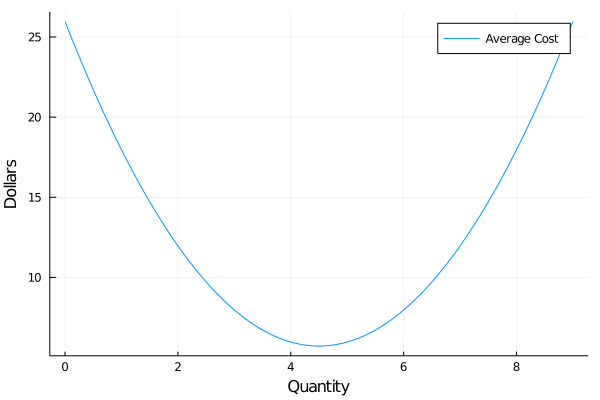

In [16]:
function averagecost(q)
    q^2 - 9q + 25.964285714285715
end
plot(averagecost, 0:0.1:9, xlabel= "Quantity",  ylabel="Dollars", label="Average Cost")

### A price taker, facing the market price of $5.71, would be forced to produce 4.5 units, when average cost are lowest:

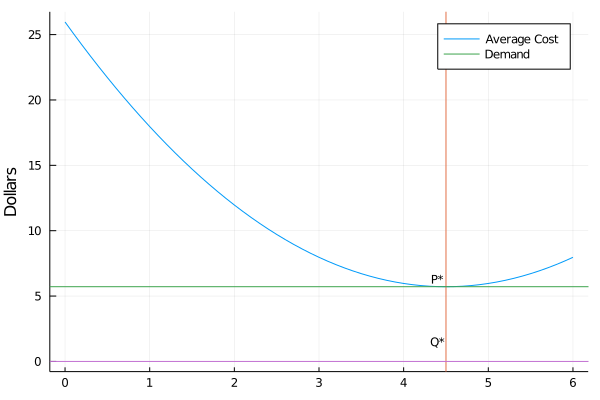

In [17]:
plot(averagecost, 0:0.1:maxx, ylabel="Dollars", label="Average Cost")
plot!([4.5], seriestype = "vline", label="")
plot!([Price], seriestype = "hline", label="Demand")
plot!(annotate = [(4.4,1.5,"Q*", 8)])
plot!(annotate = [(4.4,Price*1.1,"P*", 8)])
plot!([0], seriestype = "hline", label="")

Average cost is at minimum if the first derivative of \\[ q^2 - 9q + 25.9642\\] is zero.
\\[ 2q - 9=0\\] or \\[ q =4.5\\] 


### Note, the marginal cost behave like this:

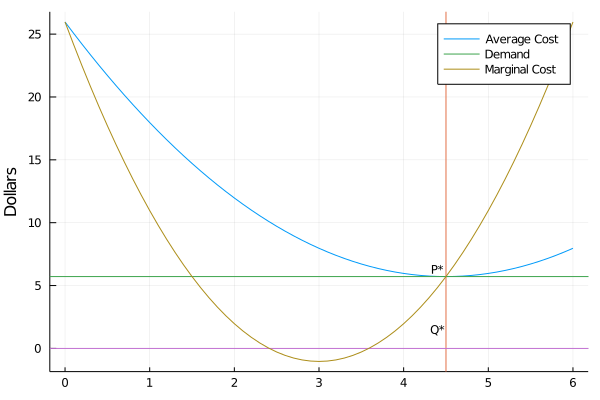

In [18]:
function margcost(q)
    3q^2 - 18q + 25.964285714285715
end
#plot(averagecost, 0:0.1:maxx, ylabel="Dollars", label="Average Cost")
plot!(margcost, 0:0.1:maxx, label="Marginal Cost")
#plot!(annotate = [(4.4,1.5,"Q* when MR = MC", 8)])

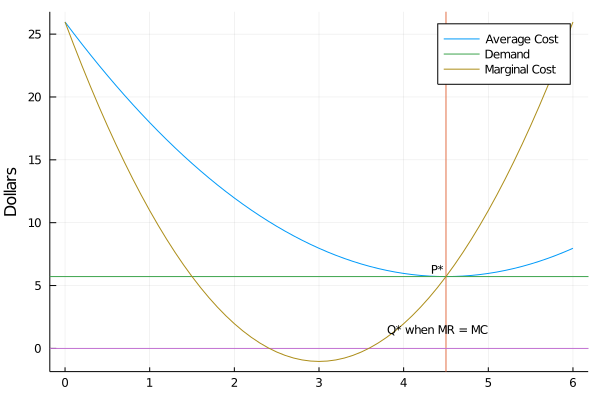

In [19]:
plot(averagecost, 0:0.1:maxx, ylabel="Dollars", label="Average Cost")
plot!([4.5], seriestype = "vline", label="")
plot!([Price], seriestype = "hline", label="Demand")
plot!(annotate = [(4.4,Price*1.1,"P*", 8)])
plot!([0], seriestype = "hline", label="")

plot!(margcost, 0:0.1:maxx, label="Marginal Cost")
plot!(annotate = [(4.4,1.5,"Q* when MR = MC", 8)])